## Grdient Boosting Regressor

This is a Boosting model which mean it is trained sequentially on a data and then converges. The model works on the concept of the additive modelling which is that if a composite function is divided into different smaller fucnction then added together it will give an approximate to that function.

## Steps Involved
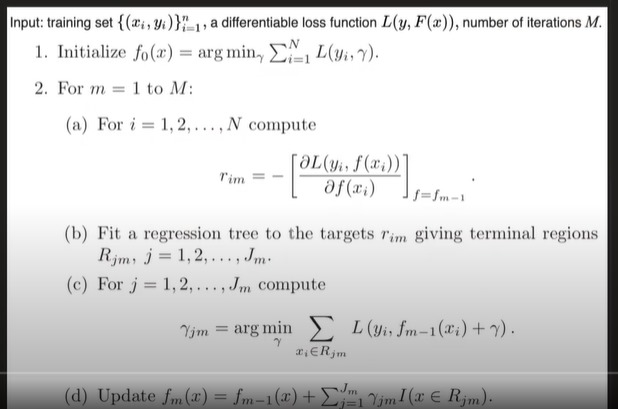
   
### Step 1- Computation of the first function(f0)
        
        The first fuction will be simple mean of the target values and then residual will be calculated as actual - predicted
        
### Step 2- Training the decison tree
        After the first residual calculation total decision trees with max_leaf_nodes in between 8 to 32 are trained on the x as input and previous residual values as target and after this prediction for this tree is done and the again residual is calculated and this process repeats iteratively
        
### Step 3- Inference 
        Inference is done for the data as the sum of the multiplication of prediction of all the functions and learnign rate

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

In [3]:
class GradientBoostingRegressor:
    
    
    def __init__(self, lr = 0.1, n_estimators = 25, base_learner = DecisionTreeRegressor):
        
        self.lr = lr
        self.n_estimators = n_estimators
        self.base_learner = base_learner
    
    def fit(self, X, y, **params):
        
        self.base_models = []
        
        #first function will be the mean of all the target values or any constant values
        # gradient of the MSE Loss function for regressor
        f0 = np.full(shape = y.shape, fill_value = np.mean(y))
        fm = f0
        
        # training all the base learners iteratively
        for i in range(0, self.n_estimators):
            
            #calculating the residual values for the previous model
            ri = y - fm;
            
            # define the base learner and training it
            mi = self.base_learner(**params)
            mi.fit(X, ri)
            self.base_models.append(m1)
            
            #predicting on the data and updating it
            y_pred_i = mi.predict(X)
            fm = fm + self.lr * y_pred_i
            
        return fm
    
    def predict(self, X):
        y_pred = np.array([])
        
        #inference on all the decision tree
        for h_i in self.base_models:
            update = self.lr*h_i.predict(X)
            
            y_pred = update if y_pred.any() else y_pred + update
        
        return y_pred